In [1]:
# load data
import pandas as pd
df = pd.read_csv('0301_c1.csv', engine = 'python')

In [2]:
# display data
df.head()

,user_id,user_os,music_id,music_type,music_name,singer,play_len,music_len,pay,long_play,long_music
0,154422682,ar,20870993,1.0,用情,狮子合唱团,22013.0,332.0,0.0,True,False
1,154421907,ip,6560858,0.0,表情不要悲伤,伯贤&D.O.&张艺兴&朴灿烈,96.0,161.0,0.0,False,False
2,154422630,ar,3385963,1.0,"Baby, Don't Cry(人鱼的眼泪)",EXO,235868.0,235.0,0.0,True,False
3,154410267,ar,6777172,0.0,3D-环绕音律1(3D Mix),McTaiM,164.0,237.0,0.0,False,False
4,154407793,ar,19472465,0.0,刚好遇见你,曲肖冰,24.0,201.0,0.0,False,False


In [4]:
df['music_id'] = df["music_id"].astype('str')
df['user_id'] = df["user_id"].astype('str')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411003 entries, 0 to 3411002
Data columns (total 11 columns):
user_id       object
user_os       object
music_id      object
music_type    float64
music_name    object
singer        object
play_len      float64
music_len     float64
pay           float64
long_play     bool
long_music    bool
dtypes: bool(2), float64(4), object(5)
memory usage: 240.7+ MB


In [6]:
df.isnull().sum(axis=0)

user_id       0
user_os       0
music_id      0
music_type    0
music_name    0
singer        0
play_len      0
music_len     0
pay           0
long_play     0
long_music    0
dtype: int64

In [7]:
# generate feature rate

import numpy as np
import matplotlib.pyplot as plt

rate = df.play_len/df.music_len
# replace invalid value
rate = rate.replace([np.inf, -np.inf], -1)
df['rate'] = rate

In [8]:
# display rate statistics
df['rate'].describe()

count    3.287464e+06
mean    -9.759583e+04
std      1.768622e+08
min     -3.206753e+11
25%      1.403509e-02
50%      2.611765e-01
75%      9.951923e-01
max      1.133359e+05
Name: rate, dtype: float64

In [9]:
# display the range of 97% data
df['rate'].quantile([0.015, 0.985])

0.015    -1.000000
0.985    30.837886
Name: rate, dtype: float64

In [10]:
# generate feature abnormal_rate
df['abnormal_rate'] = (df['rate'] <= -1) | (df['rate'] >= 31)

In [11]:
music_rate = df[['music_id', 'rate']]
music_rate.loc[df['abnormal_rate'],'rate'] = -1

/home/ye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


count    3.287464e+06
mean     3.564739e-01
std      9.525025e-01
min     -1.000000e+00
25%      1.075269e-02
50%      2.321429e-01
75%      9.926199e-01
max      3.096279e+01
Name: rate, dtype: float64


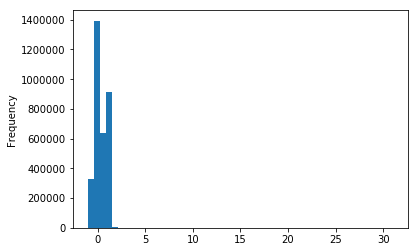

In [12]:
print(music_rate['rate'].describe())
music_rate['rate'].plot.hist(bins = 50)
plt.show()

In [13]:
music_rate.head(10)

,music_id,rate
0,20870993,-1.000000
1,6560858,0.596273
2,3385963,-1.000000
3,6777172,0.691983
4,19472465,0.119403
5,3198036,-1.000000
6,891952,1.000000
7,4623962,1.000000
8,703750,1.000000
9,6491500,0.304348


In [14]:
# example
example_rate = music_rate.loc[music_rate['music_id'] == '891952','rate']
print(example_rate.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

count    1354.000000
mean        0.351633
std         0.999075
min        -1.000000
10%        -1.000000
25%         0.003333
50%         0.241667
75%         0.996667
90%         1.000000
max        27.223333
Name: rate, dtype: float64


In [15]:
# estimate popularity of a song
music_average_rate = music_rate.groupby(['music_id'])['rate'].quantile(0.5)


In [16]:
print(df['music_id'].unique().shape)
print(df['music_id'].shape)
print(df['user_id'].unique().shape)
print(df['user_id'].shape)

(309230,)
(3411003,)
(174958,)
(3411003,)


In [19]:
example_rate.quantile(.75)

0.9966666666666667

In [17]:
print(music_average_rate.shape)
print(sum(music_average_rate > 0.5))

(309230,)
74864


In [23]:
popular_music = music_average_rate > music_average_rate.quantile(.9)

In [24]:
music_average_rate.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    304962.000000
mean          0.220513
std           0.676524
min          -1.000000
10%          -0.143397
25%           0.017045
50%           0.144444
75%           0.499593
90%           0.979503
max          30.924514
Name: rate, dtype: float64

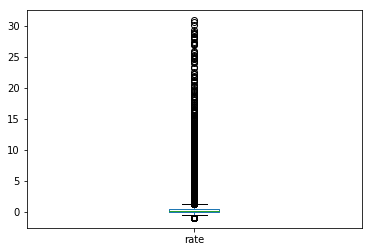

In [26]:
music_average_rate.plot.box()
plt.show()

In [27]:
popular_music.index

Index(['-1', '0', '1000013', '10000462', '1000061', '10000631', '1000064',
       '10001298', '1000174', '1000178',
       ...
       '9995015', '999579', '999790', '9997929', '9998311', '9999035',
       '9999059', '999908', '9999854', '9999930'],
      dtype='object', name='music_id', length=309230)

In [31]:
music_average_rate[popular_music].index

Index(['10005059', '10005139', '100052', '1000555', '1000755', '1000898',
       '1001070', '1001076', '1001140', '10013504',
       ...
       '9984622', '998797', '9988106', '998932', '999066', '99923', '999306',
       '999342', '999579', '9999930'],
      dtype='object', name='music_id', length=30497)